# Brain whole slide image example

## Install and import the dependencies

In [ ]:
%pip uninstall basicpy -yq
%pip install basicpy -q

In [1]:
from basicpy import BaSiC
from basicpy import datasets as bdata
from matplotlib import pyplot as plt

## Load the sample images

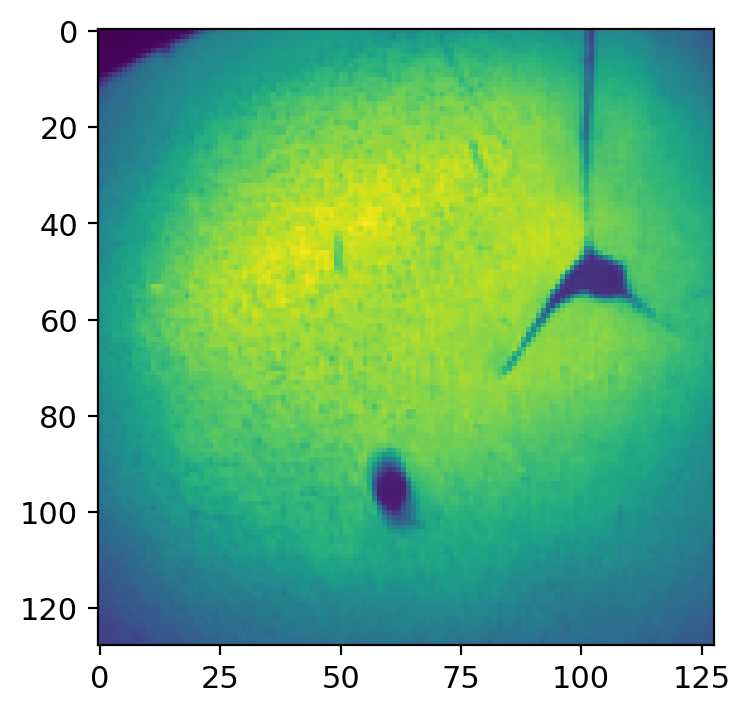

In [2]:
images = bdata.wsi_brain()
plt.imshow(images[12])

## Fit the flatfield and darkfield

In [5]:
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

INFO:basicpy.basicpy:Initializing BaSiC 11176965552 with parameters: 
get_darkfield: True
smoothness_flatfield: 1

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:_smoothness_flatfield set to 1.0
INFO:basicpy.basicpy:_smoothness_darkfield set to 1.0
INFO:basicpy.basicpy:_sparse_cost_darkfield set to 0.01
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 0.0009802745189517736.
INFO:basicpy.basicpy:mean of S: 2701.249267578125.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 0.0009872970404103398.
INFO:basicpy.basicpy:mean of S: 2681.1591796875.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.026506926864385605
INFO:basicpy.basicpy:elapsed time: 2.8755338750052033 seconds
INFO:basicpy.basicpy:reweighting iteration 2
INFO:basicpy.basicpy:single-step optimization score: 0.0009914964903146029.
IN

## Plot the fit results

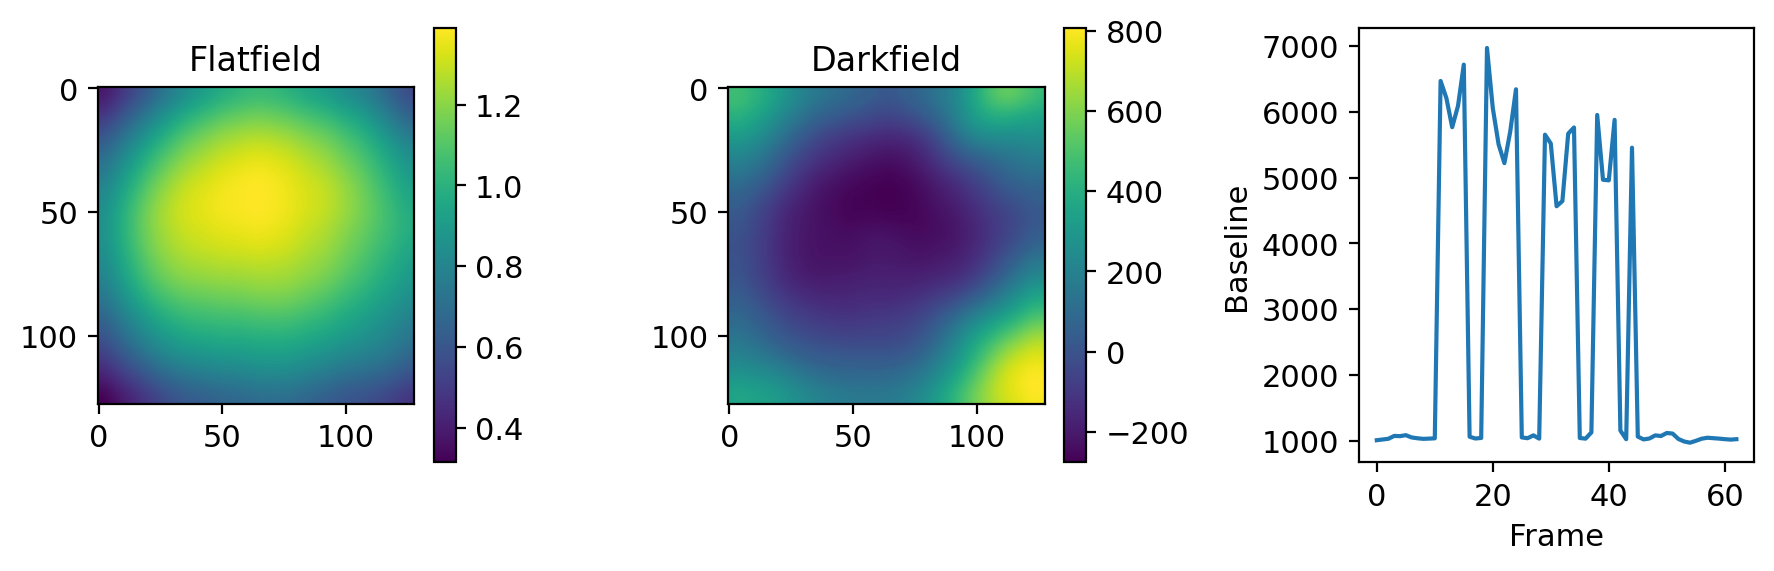

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

## Correct the original images

In [7]:
images_transformed = basic.transform(images)

INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.0012698749924311414 seconds ===


## Plot the corrected results

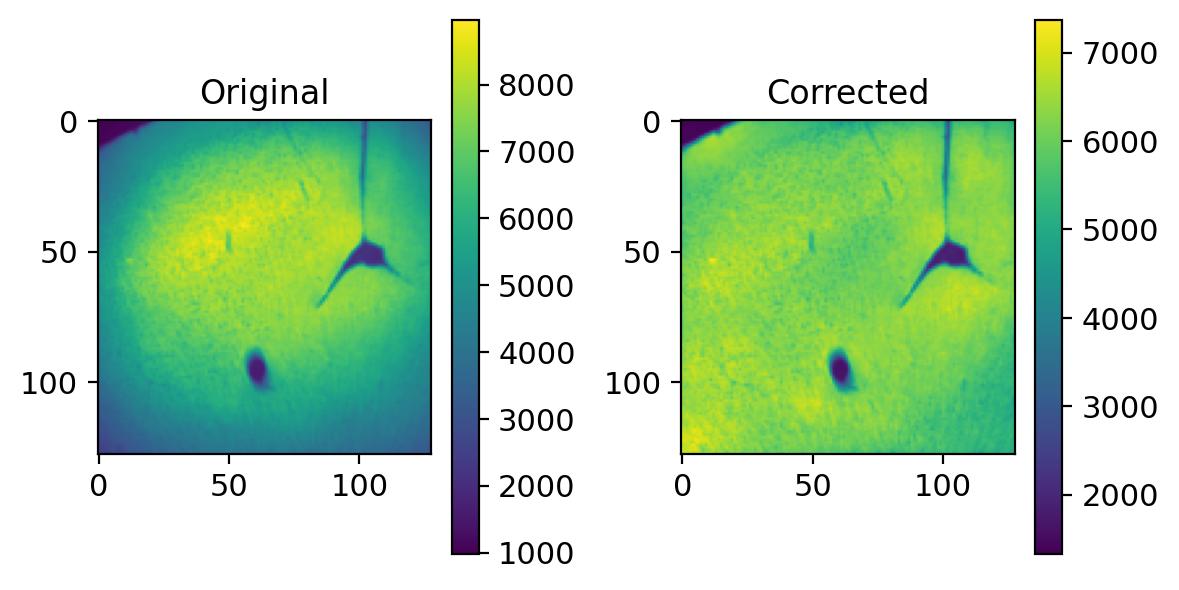

In [8]:
i = 12
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()